In [1]:
from PIL import Image
from PIL import ImageEnhance
from skimage import exposure
import argparse
from skimage.morphology import binary_dilation, dilation, binary_erosion, erosion, closing, opening
from skimage.filters import threshold_otsu
from skimage import io
import os
import matplotlib.pyplot as plt
import cv2
import skimage
from scipy import ndimage
from skimage.filters import try_all_threshold

# Adjusting Contrast:

In [2]:
def adjust_contrast(img):
    '''
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    '''
    better_contrast = exposure.rescale_intensity(img, in_range=(0.50,255))
    return better_contrast

/Users/dhanyajayachandra/Downloads/test4.png
<class 'numpy.ndarray'>


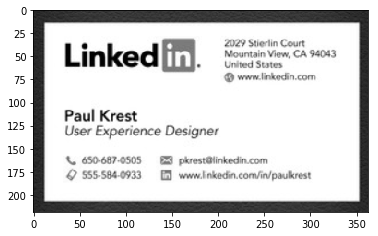

In [18]:
path = os.path.join(base_path, 'test4.png')
print(path)
if os.path.isfile(path):
    image = cv2.imread(path,0)
    print(type(image))
    plt.imshow(image, cmap = 'gray')
    plt.show()

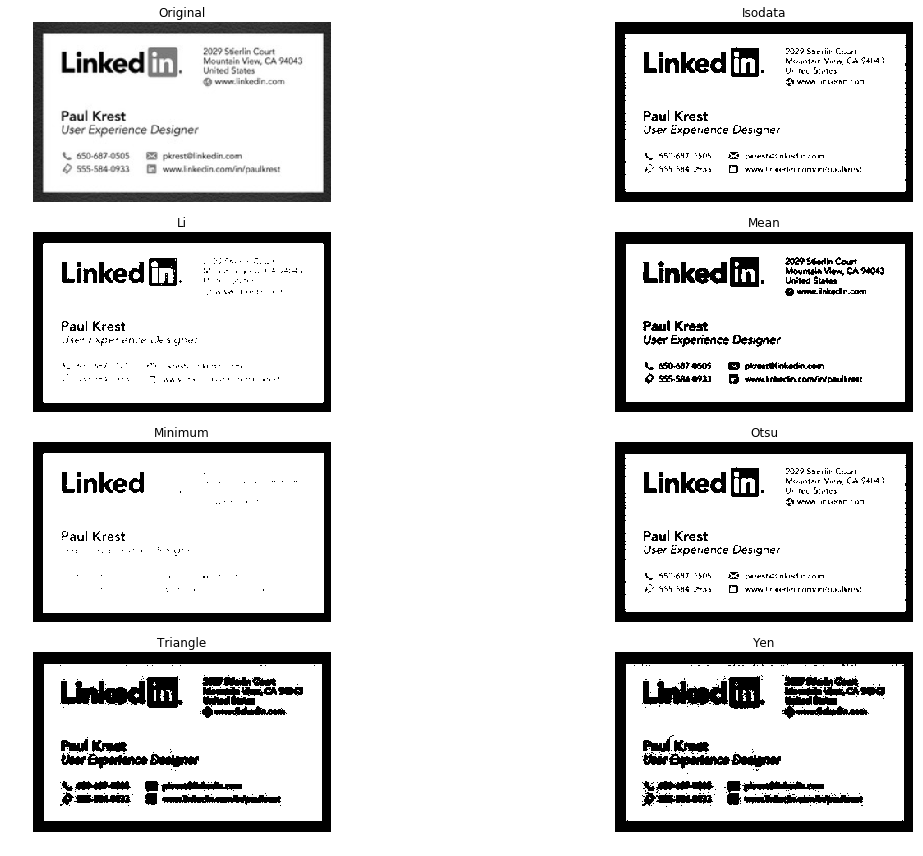

In [33]:
fig, ax = try_all_threshold(image, figsize=(20, 12), verbose=False)

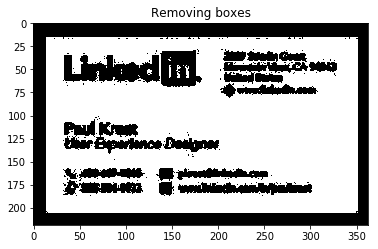

In [19]:
if exposure.is_low_contrast(image):
    image = adjust_contrast(image)
thresh = skimage.filters.threshold_yen(image)
ret, binary10 = cv2.threshold(image, thresh, 255, cv2.THRESH_BINARY)
plt.imshow(binary10, cmap='gray')
plt.title('Removing boxes')
plt.show() 

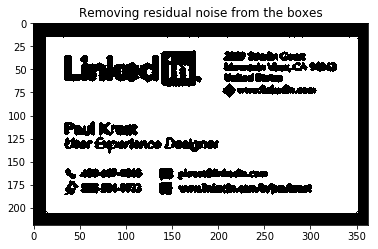

In [20]:
remove_black_dots = closing(binary10)
plt.imshow(remove_black_dots, cmap='gray')
plt.title('Removing residual noise from the boxes')
plt.show() 

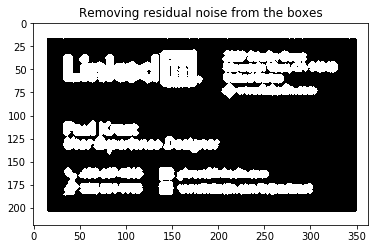

In [21]:
img = 255 - remove_black_dots
dilated = dilation(img)
plt.imshow(dilated, cmap='gray')
plt.title('Removing residual noise from the boxes')
plt.show() 

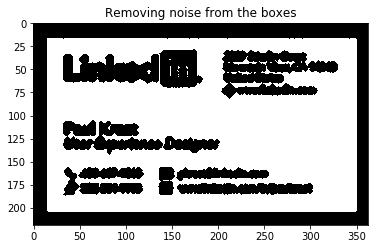

In [22]:
blured_image = ndimage.uniform_filter(255 -img, size=3)
plt.imshow(255 -dilated, cmap='gray')
plt.title('Removing noise from the boxes')
plt.show()

(219, 363)
(219, 181)


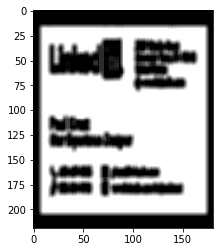

In [23]:
print(dilated.shape)
resized_image = cv2.resize(dilated, (dilated.shape[1] // 2, dilated.shape[0]))
print(resized_image.shape)
blurred = cv2.blur(resized_image, ksize = (5, 5))
blurred = 255- blurred
cv2.imwrite('/Users/hithyshikrishnamurthy/Desktop/res.png', blurred)
plt.imshow(blurred, cmap = 'gray')
plt.show()